# Q1

In [1]:
# Import modules
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Read the file
sst_data = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc', engine = 'netcdf4')

In [3]:
# Show the file
sst_data

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

## Q1.1

In [4]:
# Extract the Nino3.4 region
region_data = sst_data.sel(lat = slice(-5, 5), lon = slice(10, 60))
region_data

# Correct the sst
weights = np.cos(np.deg2rad(region_data.lat))
region_weighted = region_data.weighted(weights)
region_mean = region_weighted.mean(dim=['lon', 'lat'])
region_mean

<xarray.Dataset>
Dimensions:  (time: 684)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time) float32 27.16 27.53 28.68 29.29 ... 26.96 27.8 28.74 28.52

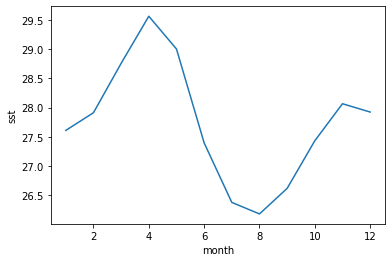

In [6]:
# Calculate the climatology and plot it
sst_clim = region_mean.sst.groupby('time.month')
sst_clim.mean().plot()

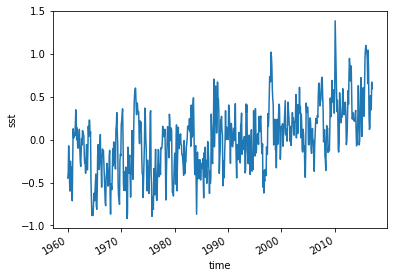

In [7]:
# Calculate the anomalies and plot it
sst_anom = sst_clim - sst_clim.mean()
sst_anom.plot()

In [8]:
# Calculate the Nino3.4
sst_rolling = sst_anom.rolling(time = 3).mean()

## Q1.2

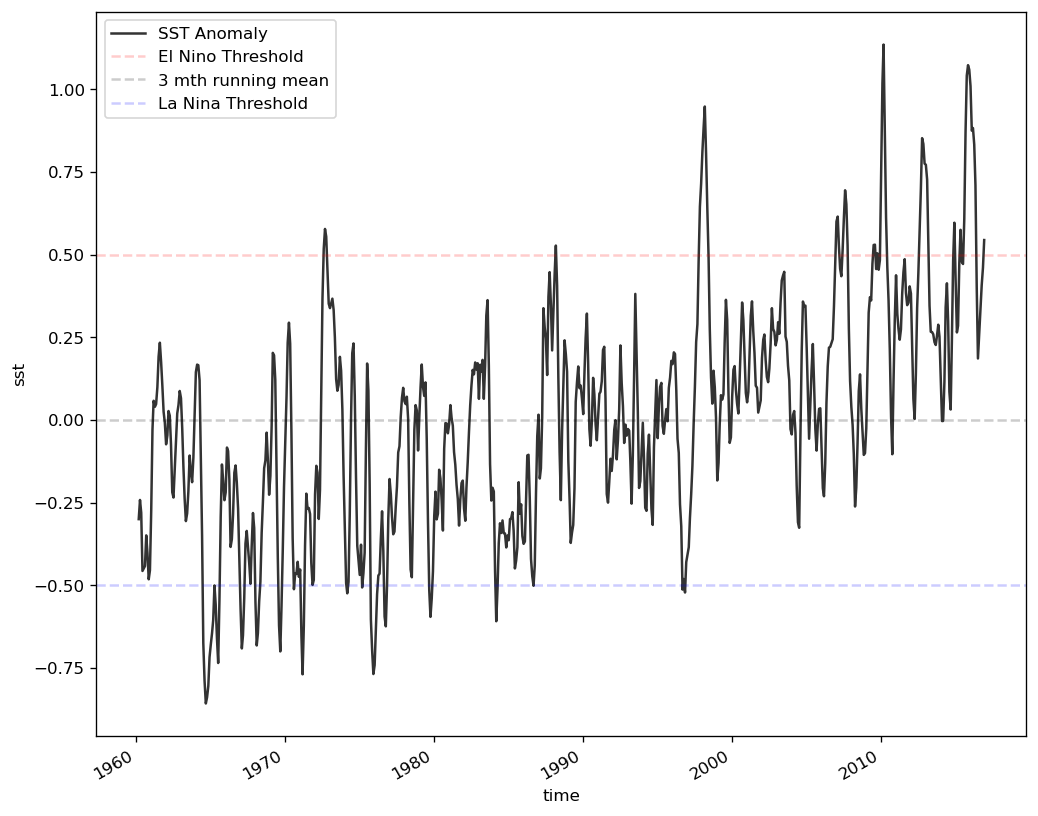

In [9]:
# Visualization
fig = plt.figure(figsize = (10, 8), dpi = 120)
sst_rolling.plot(c = 'black', alpha = 0.8, label = 'SST Anomaly')
plt.axhline(y = 0.5, ls = "--", c = "red", alpha = 0.2, label = 'El Nino Threshold')
plt.axhline(y = 0, ls = "--", c = "black", alpha = 0.2, label = '3 mth running mean')
plt.axhline(y = -0.5, ls = "--", c = "blue", alpha = 0.2, label = 'La Nina Threshold')
plt.legend()
plt.show()

# Q2

In [9]:
# Read the file
toa_data = xr.open_dataset('CERES_EBAF-TOA_200003-201701.nc', engine = 'netcdf4')

In [10]:
# Show the file
toa_data

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## Q2.1

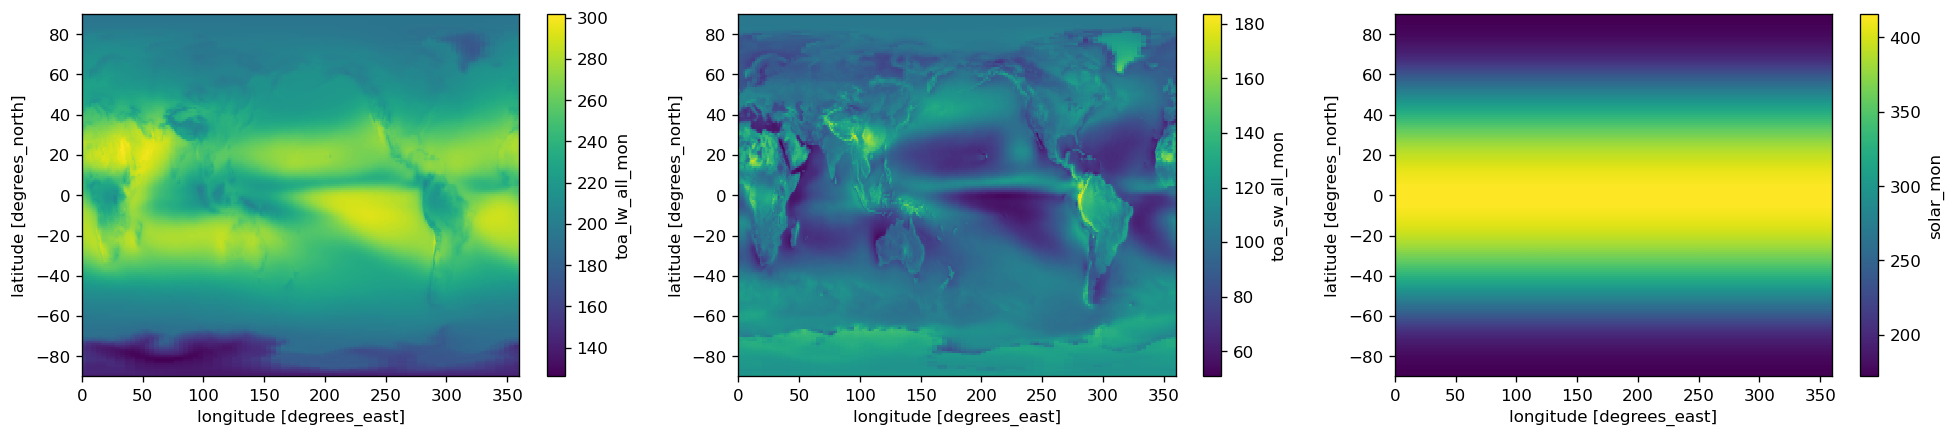

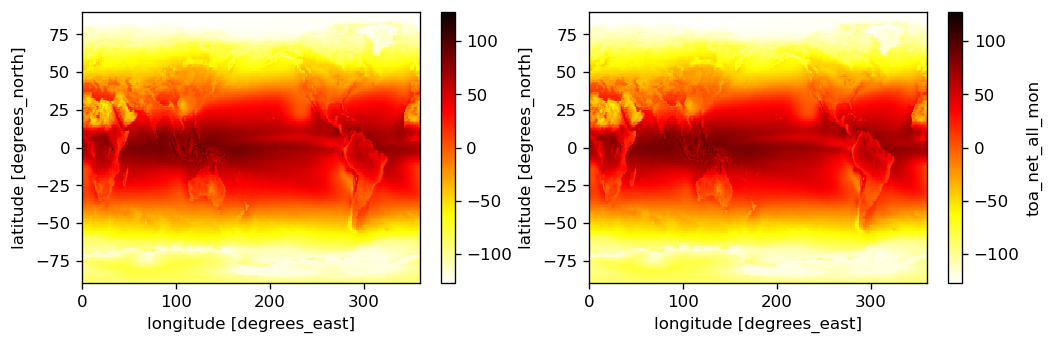

In [11]:
# Plot the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions
fig1 = plt.figure(figsize=(20,4), dpi=120)

plt.subplot(1, 3, 1)
toa_data.toa_lw_all_mon.mean(dim='time').plot()

plt.subplot(1, 3, 2)
toa_data.toa_sw_all_mon.mean(dim='time').plot()

plt.subplot(1, 3, 3)
toa_data.solar_mon.mean(dim='time').plot()

# Plot the add up data and the TOA net flux
fig2 = plt.figure(figsize=(10,3), dpi=120)

plt.subplot(1, 2, 1)
(toa_data.solar_mon.mean(dim='time')-
toa_data.toa_lw_all_mon.mean(dim='time')-
toa_data.toa_sw_all_mon.mean(dim='time')).plot(cmap='hot_r')

plt.subplot(1, 2, 2)
toa_data.toa_net_all_mon.mean(dim='time').plot(cmap='hot_r')

# Show the plot
plt.show()

## Q2.2

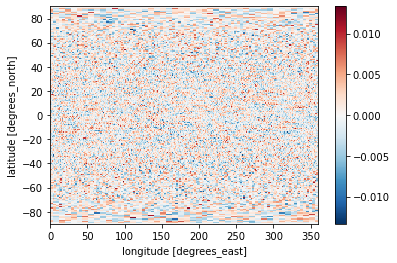

In [12]:
# Calculate add up data
add_data = (toa_data.solar_mon.mean(dim='time')-
            toa_data.toa_lw_all_mon.mean(dim='time')-
            toa_data.toa_sw_all_mon.mean(dim='time'))

# Calculate the differences
dif_data = add_data - toa_data.toa_net_all_mon.mean(dim='time')

# Visualization of the differences
dif_data.plot()

## Q2.3

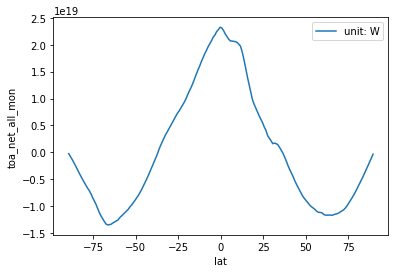

In [13]:
# Calculate and plot the total amount of net radiation in each 1-degree latitude band
# The radius of the earth is 6371393m
areas = np.cos(np.deg2rad(toa_data.lat)) * (6371393 ** 2) * np.deg2rad(1) * np.pi * 2
toa_amount = toa_data.weighted(areas)
toa_mean = toa_amount.sum(dim = ['lon', 'time'])

# Plot the whole amount
toa_mean.toa_net_all_mon.plot(label = 'unit: W')
plt.legend()
plt.show()


## Q2.4 

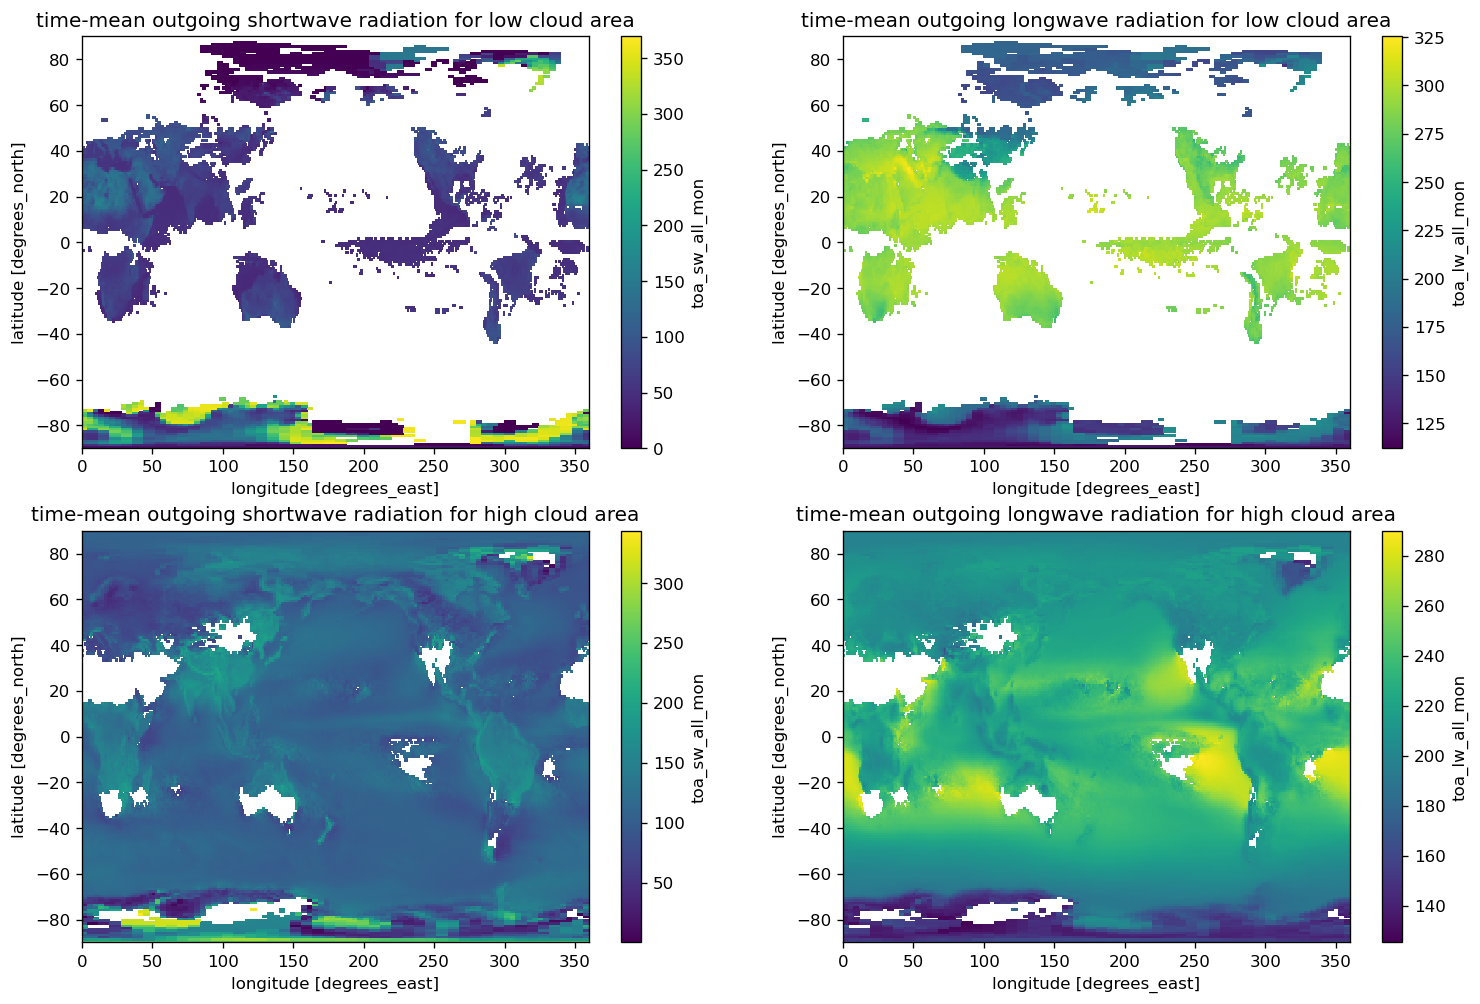

In [14]:
# Calculate and plot composites of time-mean 
# outgoing shortwave and longwave radiation for low and high cloud area regions
fig = plt.figure(figsize=(15,10), dpi=120)

# low cloud area, shortwave
plt.subplot(2, 2, 1)
toa_data.toa_sw_all_mon.where(toa_data.cldarea_total_daynight_mon <= 25).mean(dim='time').plot()
plt.title('time-mean outgoing shortwave radiation for low cloud area')

# low cloud area, longwave
plt.subplot(2, 2, 2)
toa_data.toa_lw_all_mon.where(toa_data.cldarea_total_daynight_mon <= 25).mean(dim='time').plot()
plt.title('time-mean outgoing longwave radiation for low cloud area')

# high cloud area, shortwave
plt.subplot(2, 2, 3)
toa_data.toa_sw_all_mon.where(toa_data.cldarea_total_daynight_mon >= 75).mean(dim='time').plot()
plt.title('time-mean outgoing shortwave radiation for high cloud area')

# high cloud area, longwave
plt.subplot(2, 2, 4)
toa_data.toa_lw_all_mon.where(toa_data.cldarea_total_daynight_mon >= 75).mean(dim='time').plot()
plt.title('time-mean outgoing longwave radiation for high cloud area')

plt.show()


## Q2.5

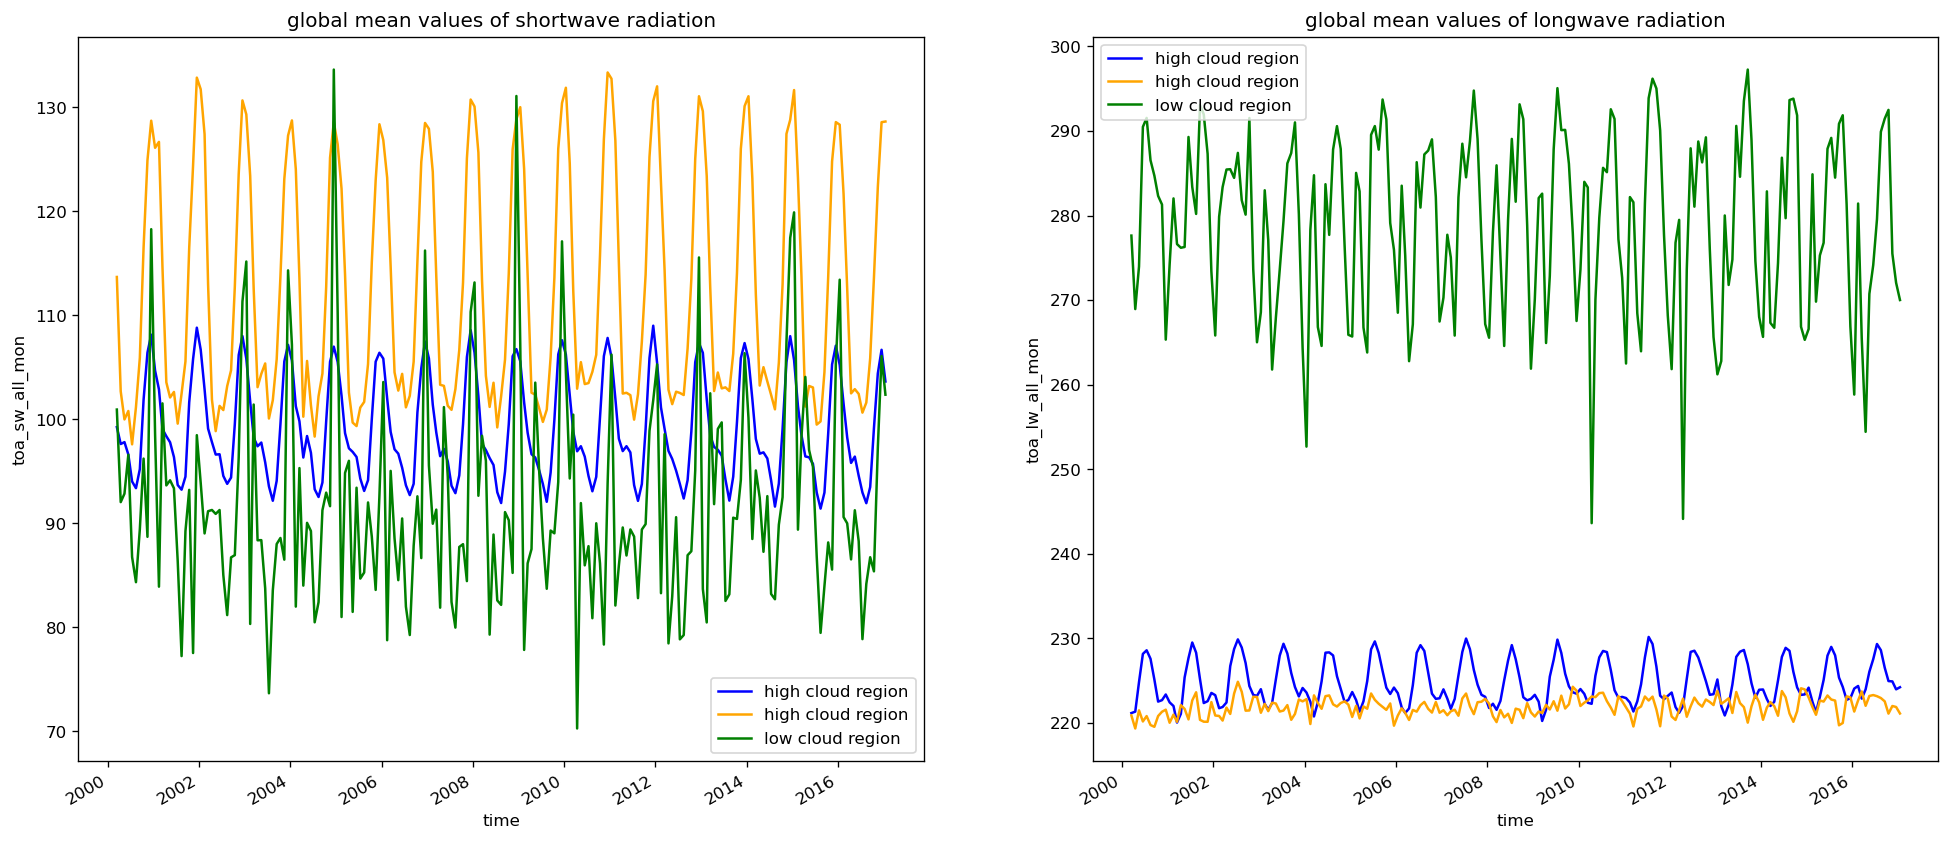

In [15]:
# Get weighted data
weights = np.cos(np.deg2rad(toa_data.lat))

# Plot the global mean values of shortwave radiation in high and low cloud regions
Fig = plt.figure(figsize=(20,8), dpi=120)

plt.subplot(1, 2, 1)
toa_data.toa_sw_all_mon.weighted(weights).mean(dim=['lon', 'lat']).plot(color = 'blue', label = 'high cloud region')
toa_data.toa_sw_all_mon.where((toa_data.cldarea_total_daynight_mon >= 75)).weighted(weights).mean(dim=['lon', 'lat']).plot(color = 'orange', label = 'high cloud region')
toa_data.toa_sw_all_mon.where(toa_data.cldarea_total_daynight_mon <= 25).weighted(weights).mean(dim=['lon', 'lat']).plot(color = 'green', label = 'low cloud region')
plt.title('global mean values of shortwave radiation')
plt.legend()

plt.subplot(1, 2, 2)
toa_data.toa_lw_all_mon.mean(dim=['lon', 'lat']).plot(color = 'blue', label = 'high cloud region')
toa_data.toa_lw_all_mon.where(toa_data.cldarea_total_daynight_mon >= 75).weighted(weights).mean(dim=['lon', 'lat']).plot(color = 'orange', label = 'high cloud region')
toa_data.toa_lw_all_mon.where(toa_data.cldarea_total_daynight_mon <= 25).weighted(weights).mean(dim=['lon', 'lat']).plot(color = 'green', label = 'low cloud region')
plt.title('global mean values of longwave radiation')
plt.legend(loc='upper left')

plt.show()

# Q3

In [16]:
# Read the file
ds = xr.open_dataset('monthly_tem.nc', engine = 'netcdf4')

In [17]:
# Show the file
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, expver: 2, time: 142)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2021-10-01
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-06 22:44:04 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

## Q3.1

In [18]:
group_data = ds.groupby('time.month')
anom = group_data - group_data.mean(dim=['time', 'expver'])

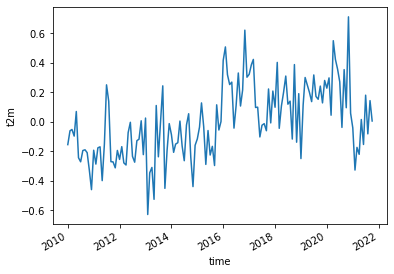

In [19]:
anom.t2m.mean(dim=['longitude', 'latitude', 'expver']).plot()

## Q3.2

In [20]:
# Weighted
weights = np.cos(np.deg2rad(ds.latitude))

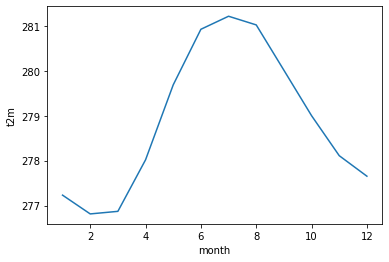

In [21]:
# Plot monthly climatology
ds.t2m.groupby('time.month').mean(dim = ['longitude', 'latitude', 'expver', 'time']).plot()

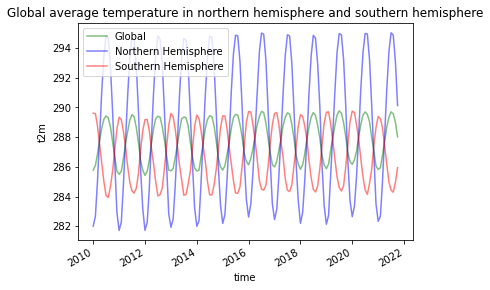

In [22]:
# Plot of global average temperature
ds.t2m.weighted(weights).mean(dim = ['longitude', 'latitude', 'expver']).plot(color = 'green', alpha = 0.5, label = 'Global')
ds.t2m.where(ds.latitude >= 0).weighted(weights).mean(dim = ['longitude', 'latitude', 'expver']).plot(color = 'blue', alpha = 0.5, label = 'Northern Hemisphere')
ds.t2m.where(ds.latitude <= 0).weighted(weights).mean(dim = ['longitude', 'latitude', 'expver']).plot(color = 'red', alpha = 0.5, label = 'Southern Hemisphere')
plt.title('Global average temperature in northern hemisphere and southern hemisphere')
plt.legend()
plt.show()

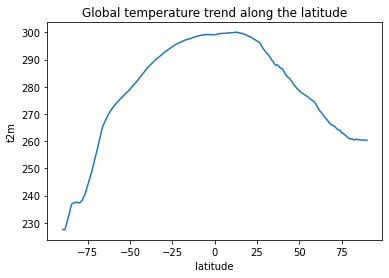

In [23]:
# Plot of temperature trend along the latitude
ds.t2m.weighted(weights).mean(dim = ['longitude', 'time', 'expver']).plot()
plt.title('Global temperature trend along the latitude')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x16c465593a0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c46559a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c46559040>],
 'medians': [<matplotlib.lines.Line2D at 0x16c46564160>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c465644c0>],
 'means': []}

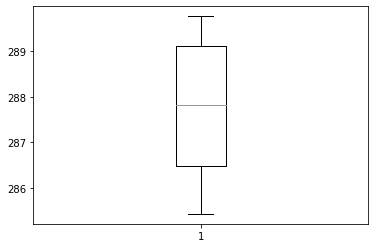

In [24]:
# Plot a box plot
ave = ds.t2m.weighted(weights).mean(dim=['longitude', 'latitude', 'expver']).values
plt.boxplot(ave)

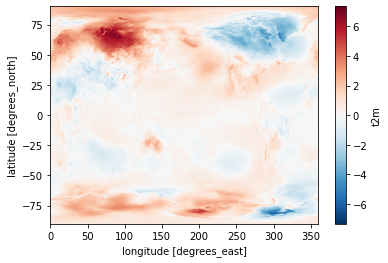

In [25]:
# Plot the difference of annual average temperature in 2010 and 2020
dif = ds.t2m.sel(time='2020').mean(dim = ['time', 'expver']) - ds.t2m.sel(time='2010').mean(dim = ['time', 'expver'])
dif.plot()